In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("data/data_article.csv")

In [6]:
df.sort_values(by="DATE")

,Unnamed: 0,URL,TITRE,IDinDB,TYPE,RESUME,ARTICLE,DATE
1173,1173,https://www.millenaire3.com/ressources/en-pass...,En passant par le centre : la rue de la Républ...,17077,Étude,"Au plus fort des débats sur la ""dégradation"" d...",Sommaire Chapitre I : De la flânerie1. Qui va...,01/01/1990
1253,1253,https://www.millenaire3.com/ressources/la-popu...,La population française d’ici à 2015 : à la re...,34668,Texte,Quelles sont les tendances de la démographie e...,,01/01/1998
1947,1947,https://www.millenaire3.com/ressources/gouvern...,Gouvernements métropolitains et gouvernance da...,21010,Texte,Une première partie est consacrée aux argument...,,01/01/1998
1948,1948,https://www.millenaire3.com/ressources/la-repu...,La République contre la ville : essai sur l’av...,29316,Texte,Article consacré au renouvellement des régulat...,,01/01/1998
1940,1940,https://www.millenaire3.com/ressources/l-etat-...,L’Etat au coeur : le meccano de la gouvernance,52954,Texte,La gouvernance est le défi essentiel du procha...,Titre des chapitres :- De la réforme administr...,01/01/1998
...,...,...,...,...,...,...,...,...
2321,2321,https://www.millenaire3.com/ressources/La-fami...,La « famille associative » du handicap à Lyon ...,18867,Étude,Les associations qui agissent dans le champ du...,Le répertoire d’actions associatif à l’égard d...,31/12/2010
3839,3839,https://www.millenaire3.com/dossiers/VILLE-ET-...,La « famille associative » du handicap à Lyon ...,18867,Étude,Les associations qui agissent dans le champ du...,Le répertoire d’actions associatif à l’égard d...,31/12/2010
3851,3851,https://www.millenaire3.com/dossiers/2011/vill...,La « famille associative » du handicap à Lyon ...,18867,Étude,Les associations qui agissent dans le champ du...,Le répertoire d’actions associatif à l’égard d...,31/12/2010
4141,4141,https://www.millenaire3.com/dossiers/2015/m3-s...,M3 Société urbaine et action publique - N°4,485612,Étude,La revue M3 – société urbaine et action publiq...,Sommaire du n°4 : Grand entretien ■ François...,31/12/2012


In [10]:
df.DATE = pd.to_datetime(df.DATE)
df.DATE = pd.to_datetime(df.DATE, format='%d/%m/%y')

<AxesSubplot:>

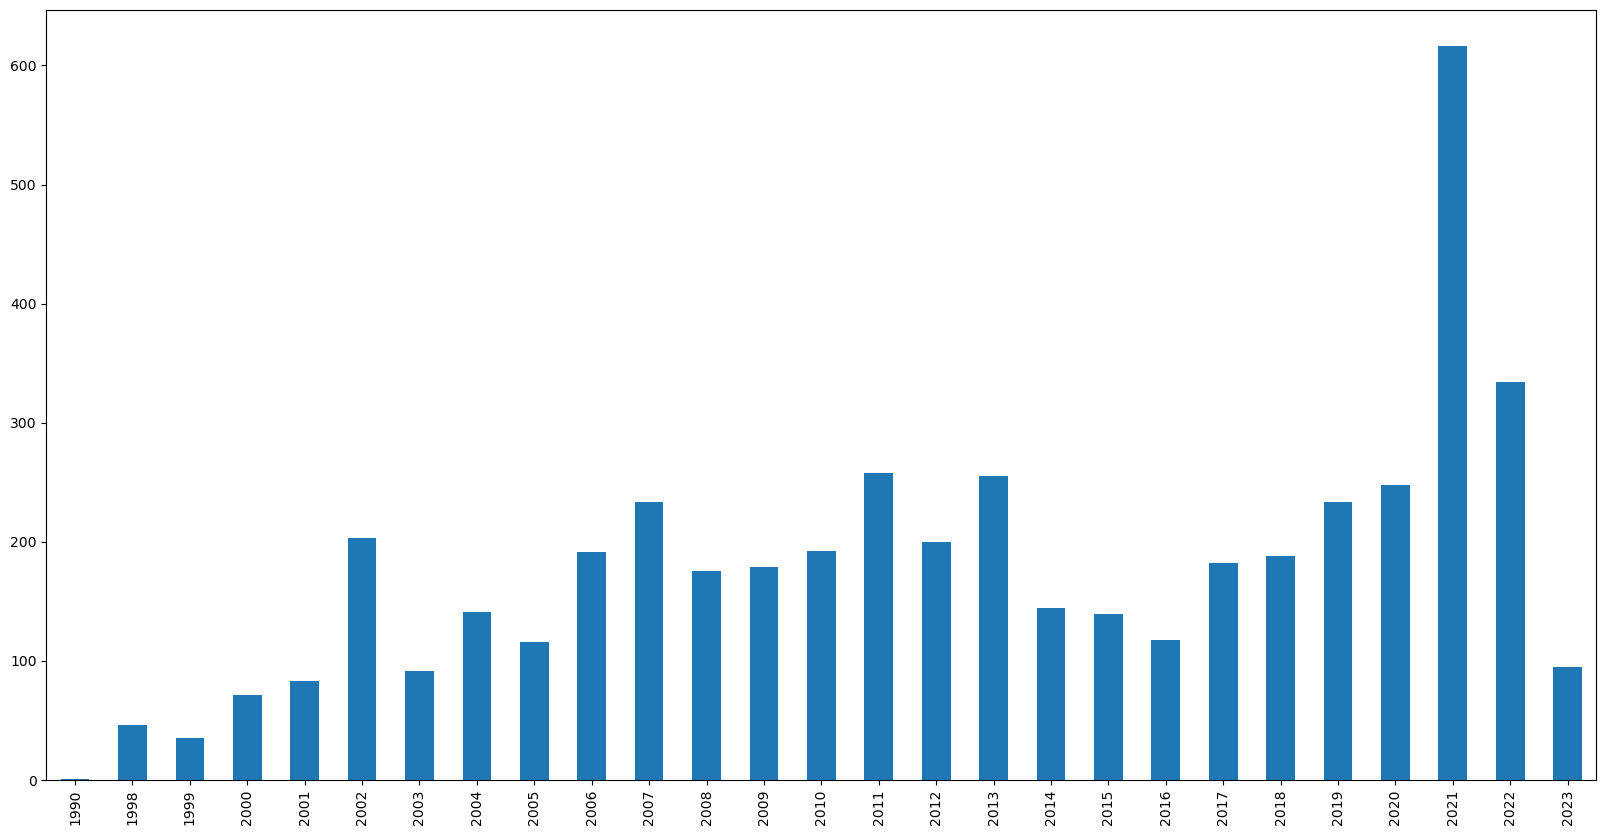

In [11]:
df.DATE.dt.year.value_counts().sort_index().plot(kind = "bar", figsize=(20, 10))

### TEXTE


In [201]:

errors = []
for i in range(df.shape[0]):
    if type(df.loc[i, "RESUME"]) != str and type(df.loc[i, "ARTICLE"]) != str:
        errors.append(df.URL[i])

print(len(errors))
for i, item in enumerate(errors): 
    print(i, item)

1
0 https://www.millenaire3.com/ressources/1-test-ressource


In [8]:
df.loc[df.URL == "https://www.millenaire3.com/ressources/label-ville-internet-2000.-une-mesure-de-la-vitalite-des-collectivites-dans-le-developpement-de-l-internet-citoyen",]

,Unnamed: 0,URL,TITRE,IDinDB,TYPE,RESUME,ARTICLE,DATE
1247,1247,https://www.millenaire3.com/ressources/label-v...,Label ville Internet 2000. Une mesure de la vi...,26639,Texte,NaN,L’opération « Label villes Internet » soutenue...,2000-01-01


In [202]:
concat = []
for i in range(df.shape[0]):
    texte = ""
    if type(df.loc[i, "RESUME"]) == str:
        texte = df.loc[i, "RESUME"].replace("\n", " ")
    if type(df.loc[i, "ARTICLE"]) == str:
        texte += " "+df.loc[i, "ARTICLE"].replace("\n", " ")
    concat.append(texte)

print(len(df))
print(len(concat))

4766
4766


No NA : (1380, 8)
With NA : (2774, 8)


<AxesSubplot:>

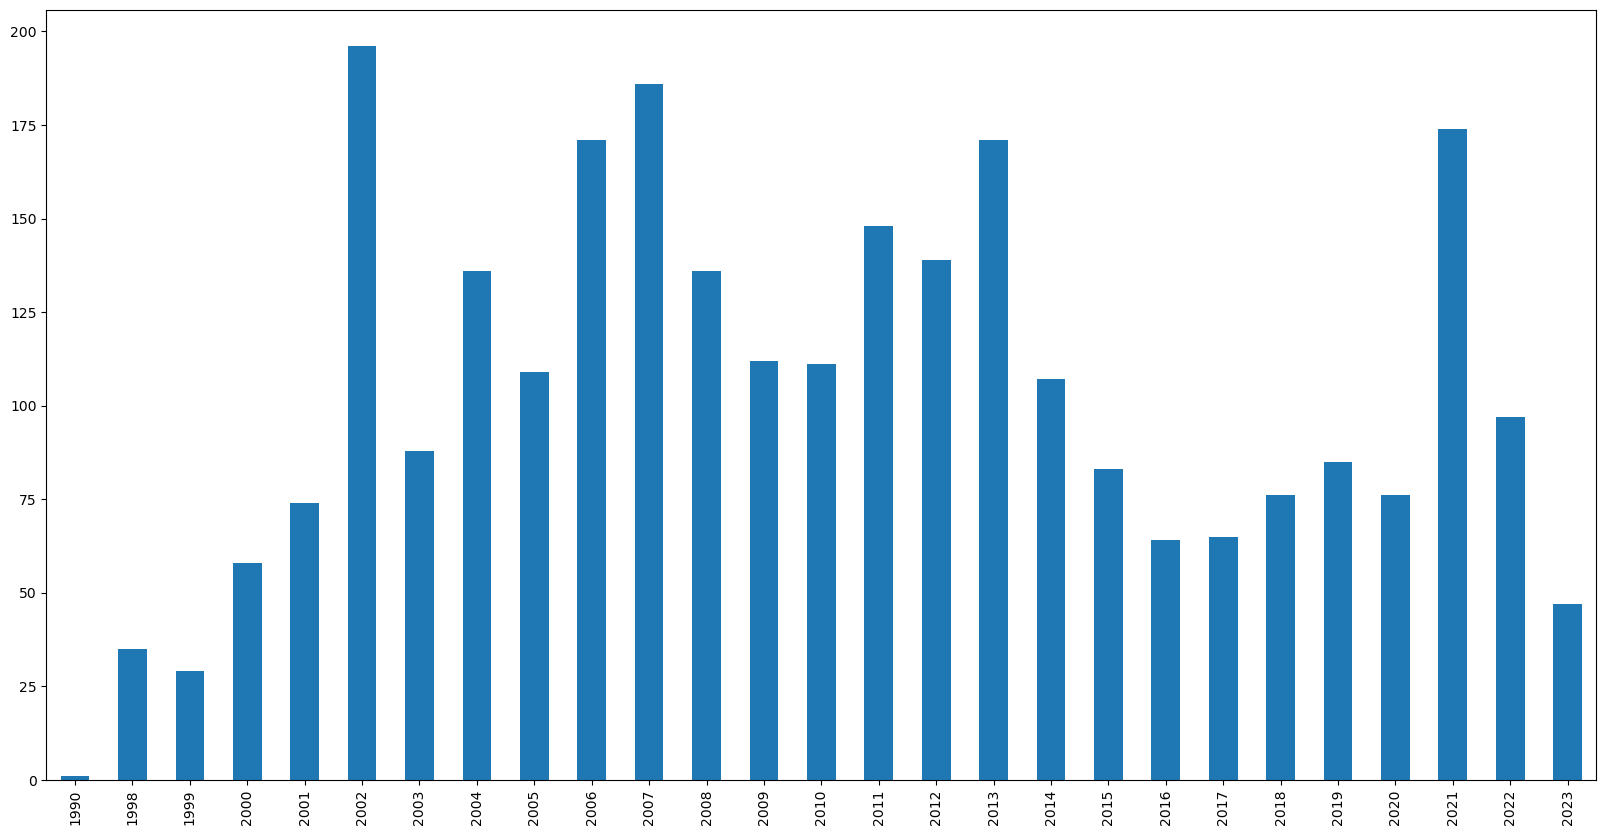

In [12]:
df2 = df.loc[df.TITRE.duplicated() != True,].sort_values(by="IDinDB")
dfnotna = df2.loc[df2.IDinDB.notna()]
print(f"No NA : {dfnotna.shape}\nWith NA : {df2.shape}")
df2["YEAR"] = df2.DATE.dt.year
df2.YEAR.value_counts().sort_index().plot(kind="bar", figsize=(20, 10))

In [204]:
df2.groupby("DATE").count().URL

DATE
1990-01-01     1
1998-01-01    22
1998-02-13     1
1998-02-15     2
1998-03-15     1
              ..
2023-09-03     1
2023-10-03     1
2023-10-28     1
2023-11-05     1
2023-12-01     1
Name: URL, Length: 1458, dtype: int64

<AxesSubplot:title={'center':'Auteurs de M3 avec 10 ou plus publications'}>

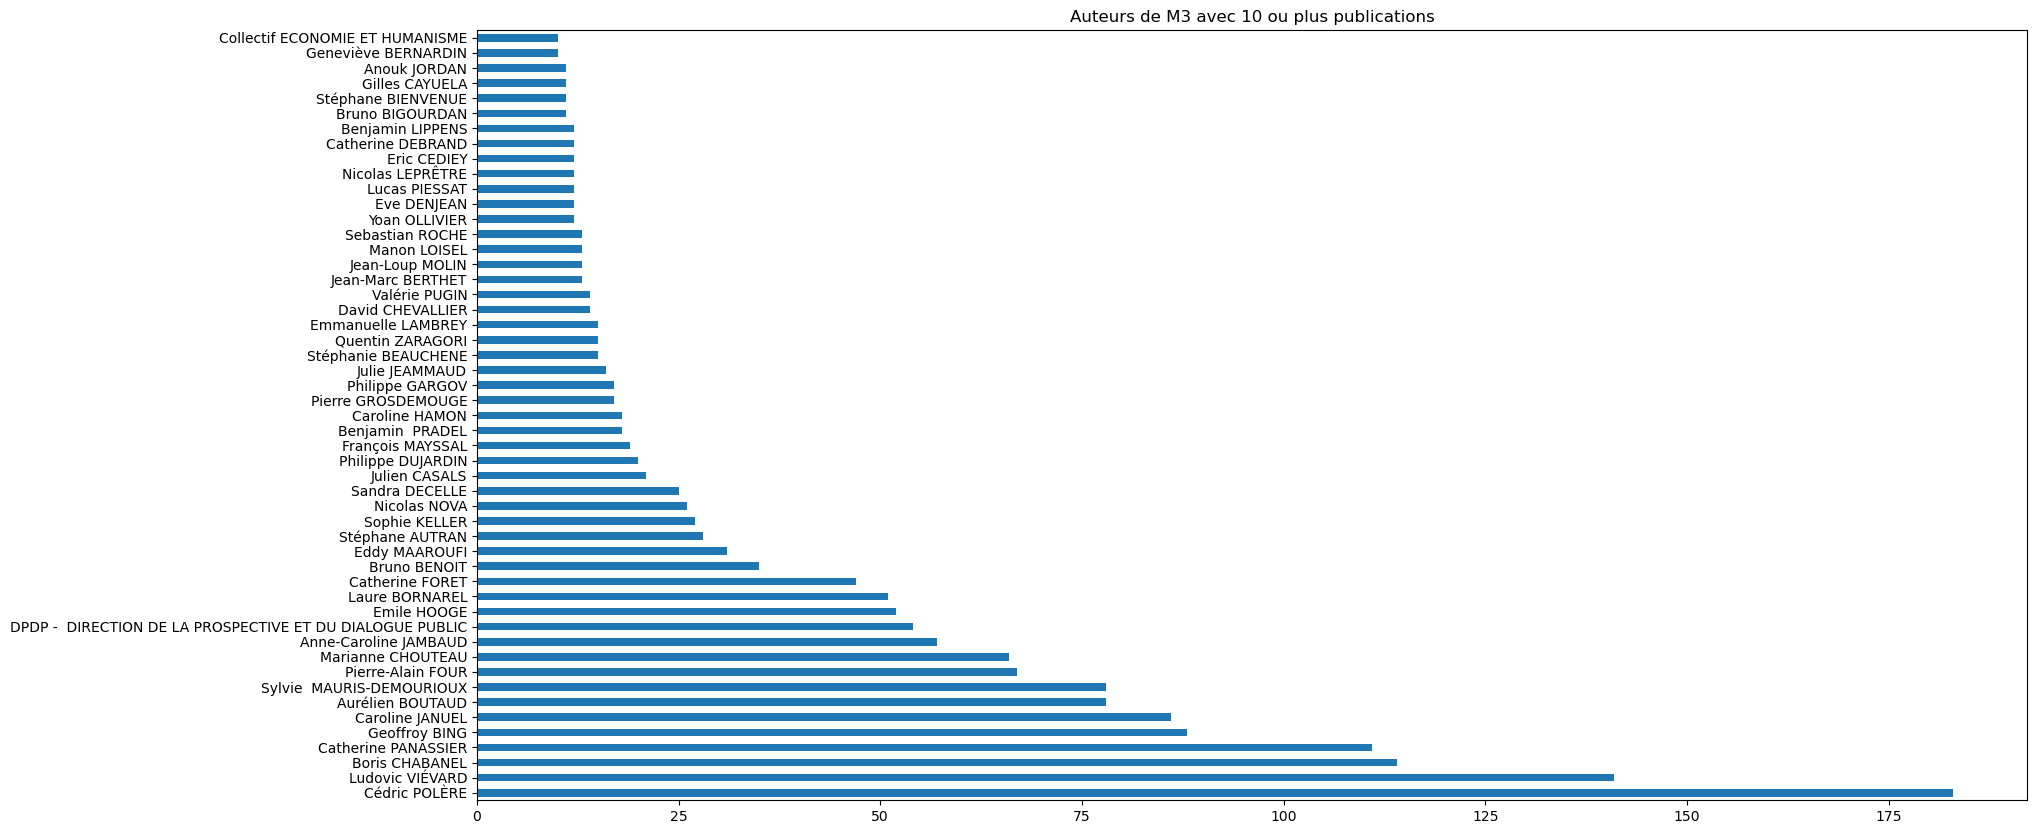

In [29]:
aut = pd.read_csv("./res/auteurs.csv", index_col=0)
tmp = aut.set_index("url").join(df2.set_index("URL")[["YEAR", "DATE"]])
tmp = tmp.loc[tmp.DATE.notna()]
tmp.groupby("auteurs").filter(lambda x:len(x) >= 10).auteurs.value_counts().plot(kind="barh", figsize=(20, 10), title="Auteurs de M3 avec 10 ou plus publications")

<AxesSubplot:ylabel='auteurs'>

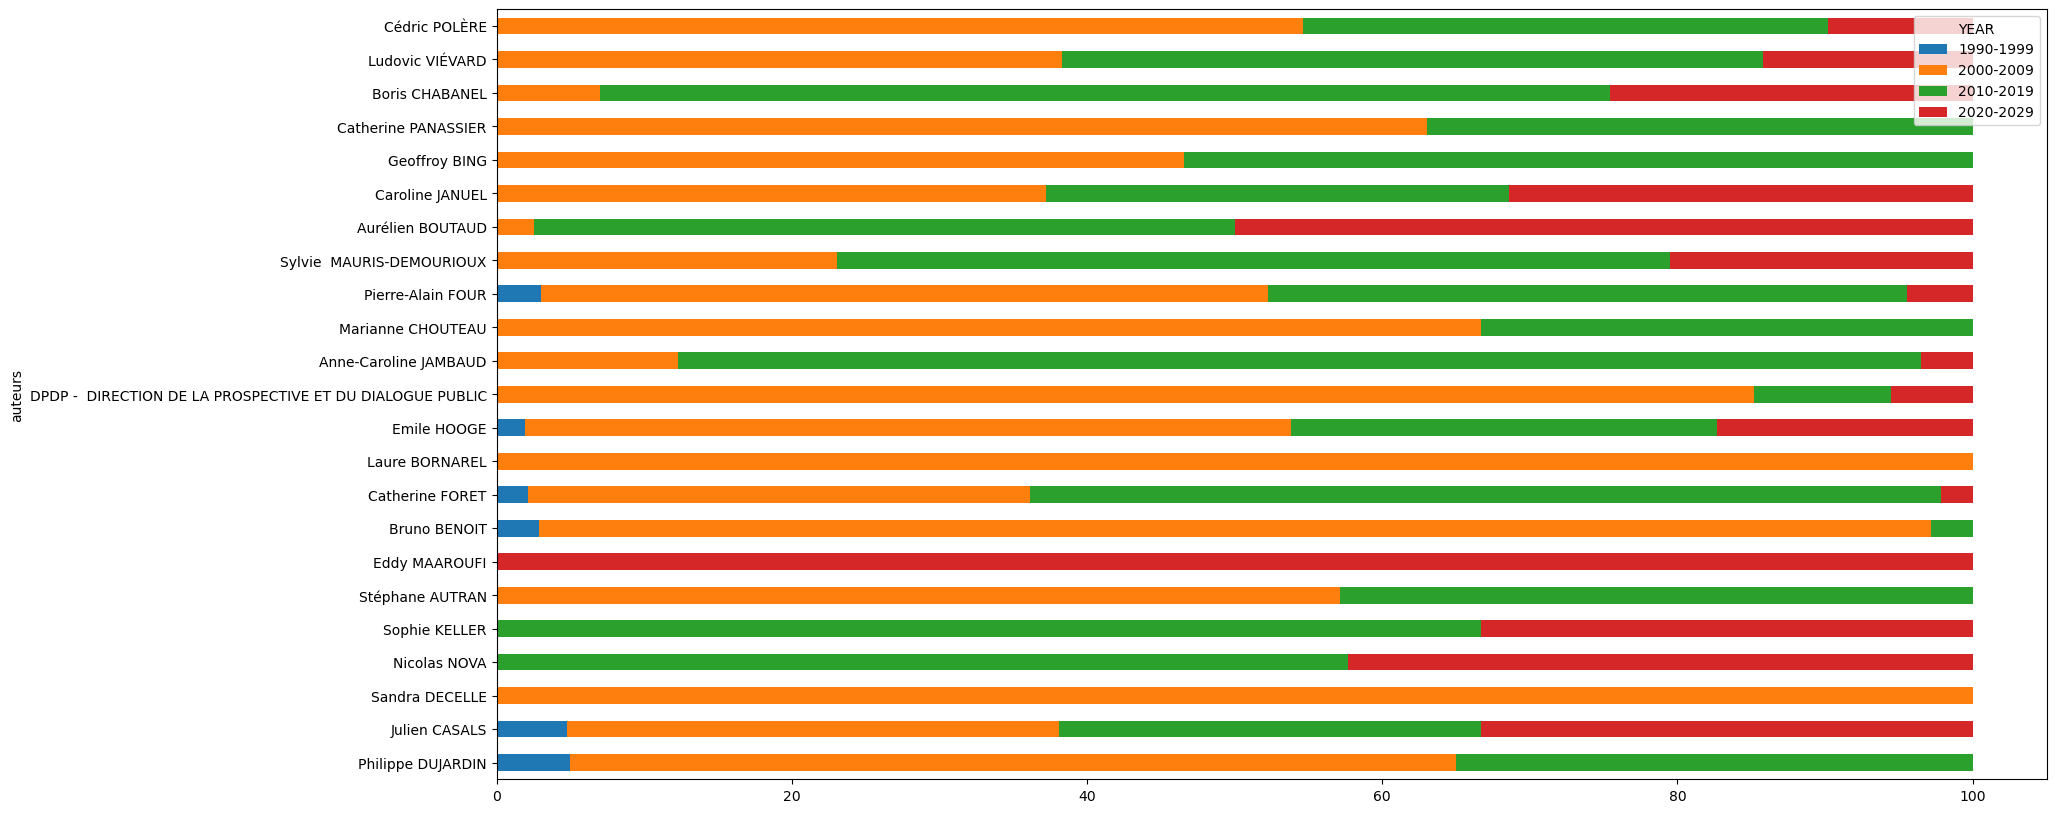

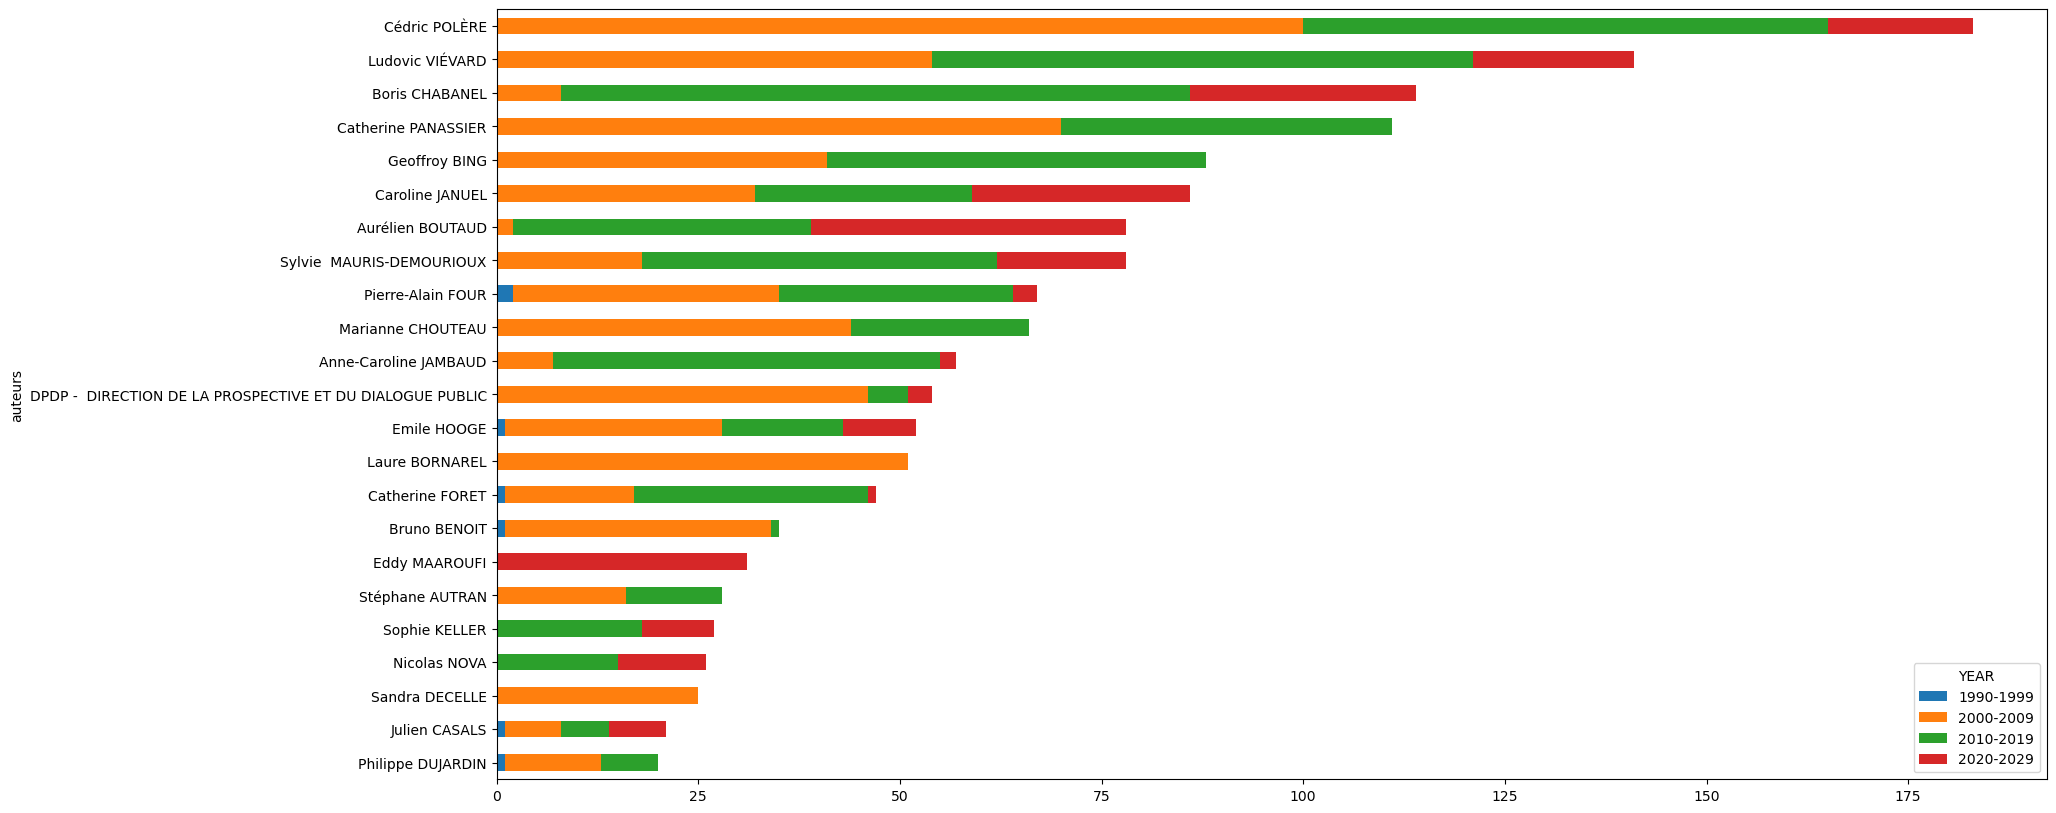

In [95]:
filtered_tmp = tmp.groupby("auteurs").filter(lambda x:len(x) >= 20)
filtered_tmp.YEAR = filtered_tmp.YEAR.replace([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1998, 1999], 
                                         "1990-1999").replace([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], 
                                                        "2000-2009").replace([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 
                                                                         "2010-2019").replace([2020, 2021, 2022, 2023, 2024, 2025], "2020-2029")
temp = pd.crosstab(filtered_tmp.auteurs, filtered_tmp.YEAR)
s = temp.sum(axis=1)
temp["tot"] = s
temp.sort_values(by="tot", ascending=True).drop("tot", axis = 1).transpose().transform(lambda x:x/sum(x)).mul(100).transpose().plot(kind = "barh", figsize=(20, 10), stacked=True)
temp.sort_values(by="tot", ascending=True).drop("tot", axis = 1).plot(kind = "barh", figsize=(20, 10), stacked=True)

<AxesSubplot:xlabel='YEAR'>

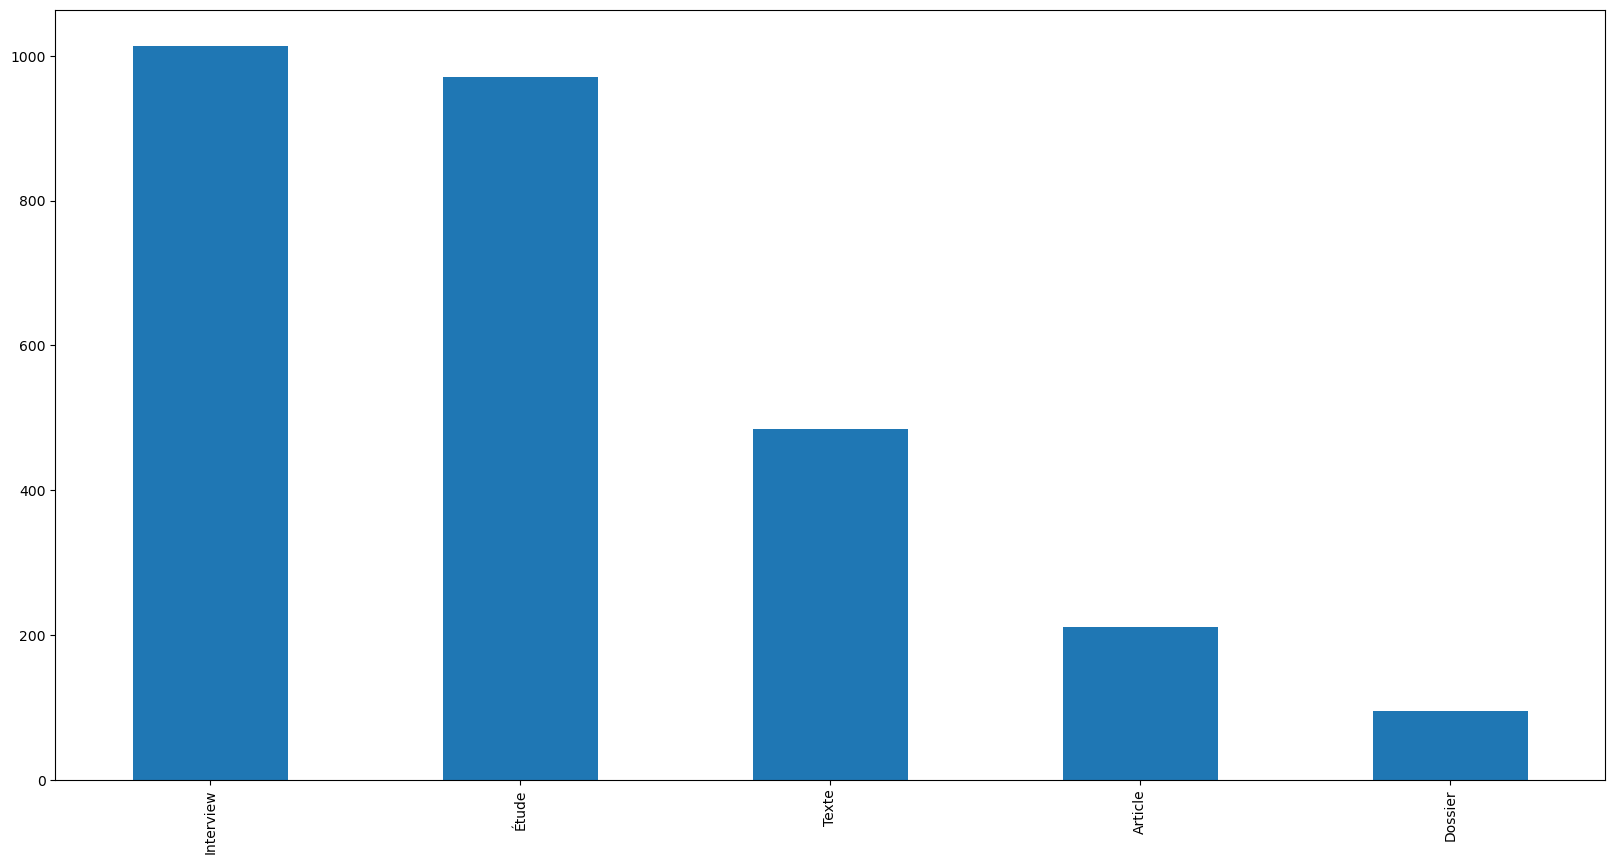

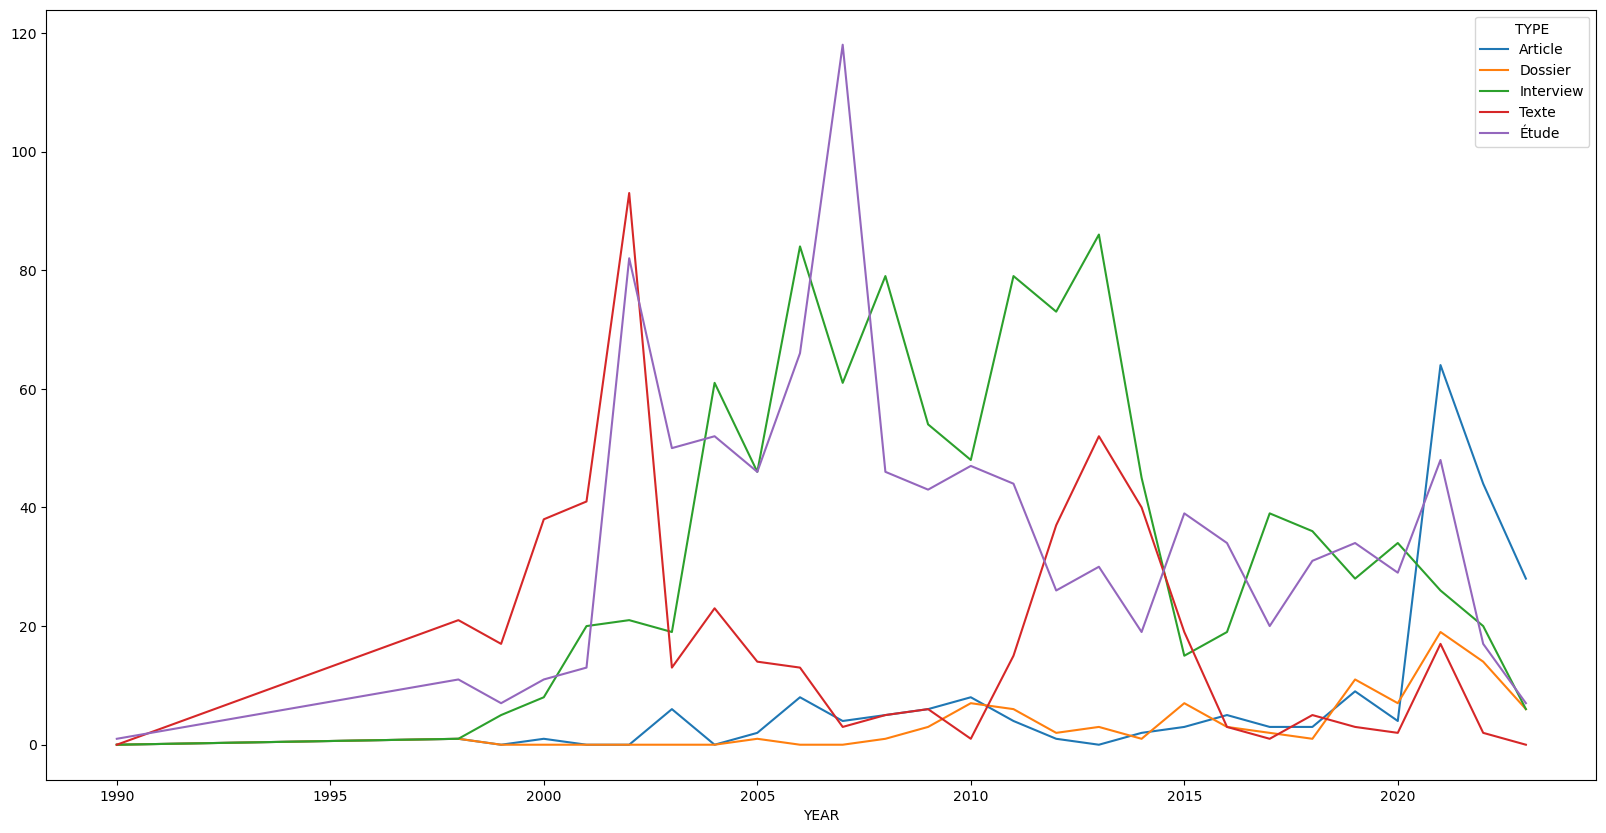

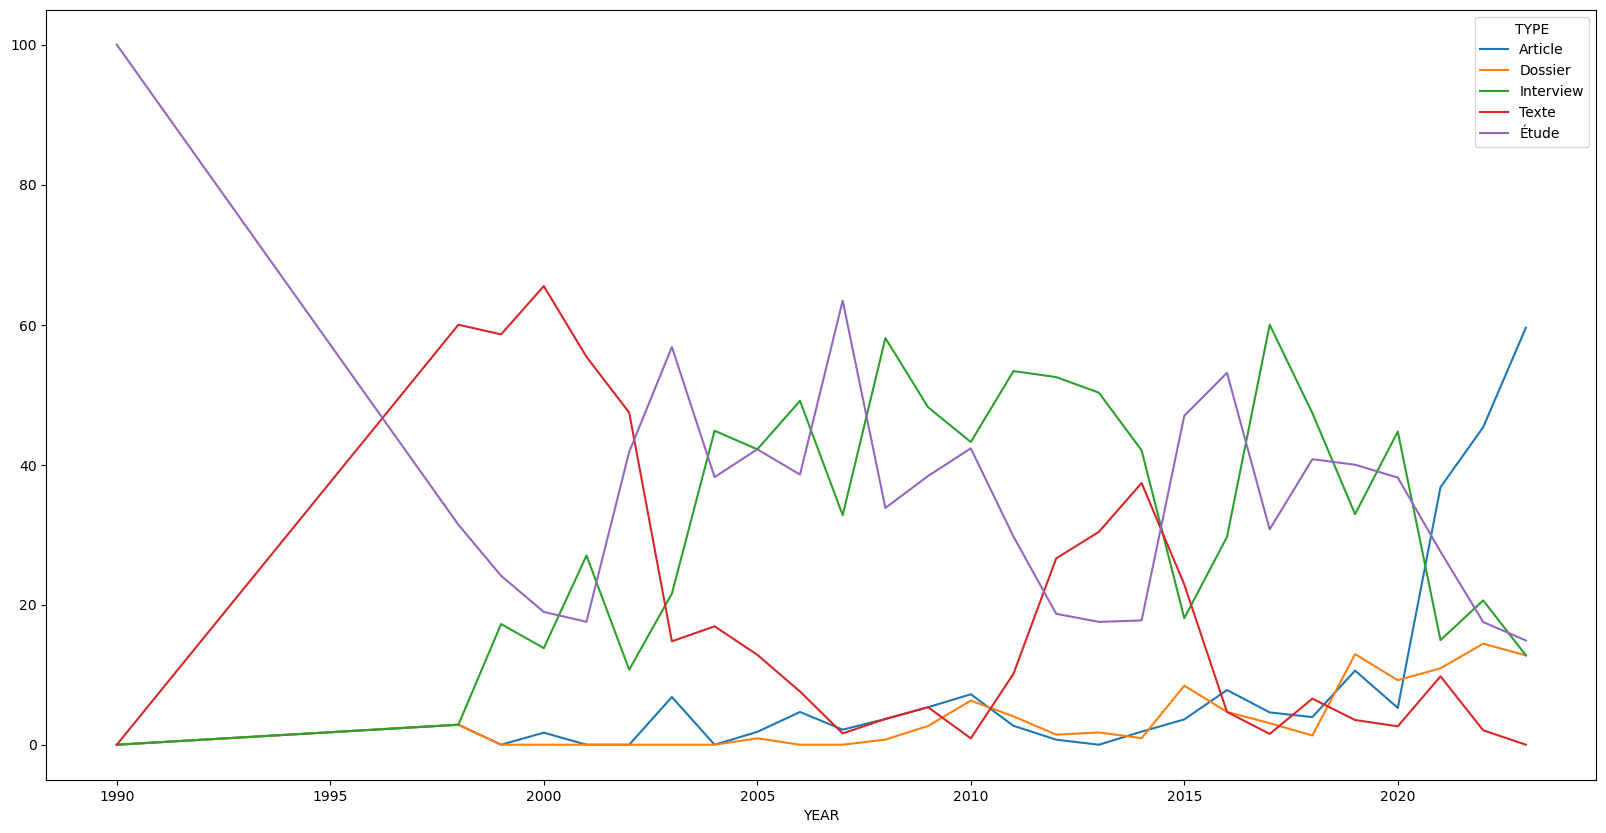

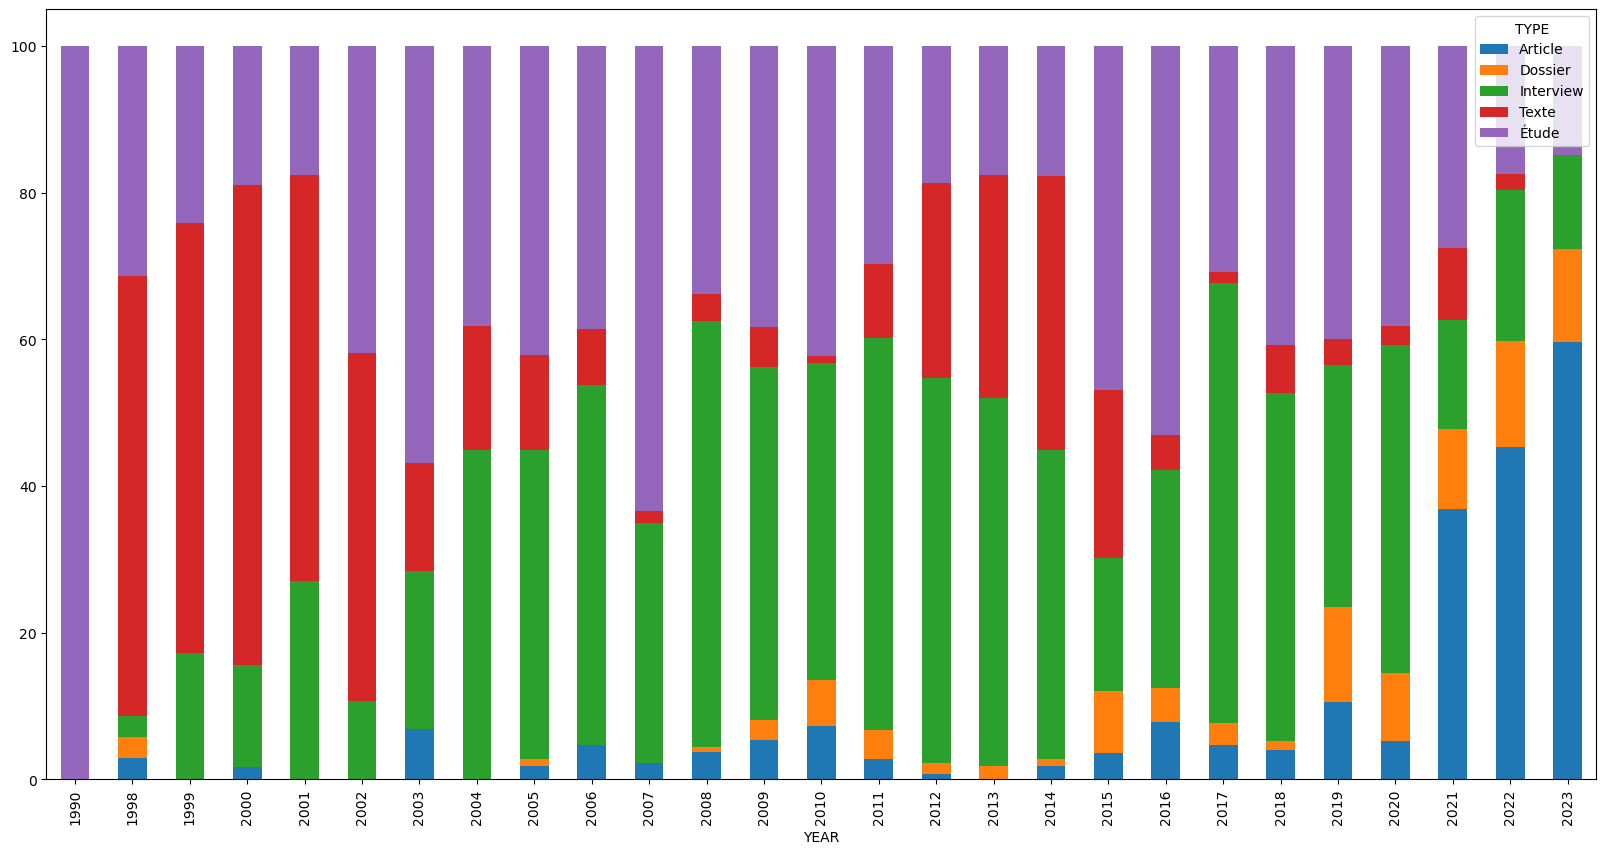

In [120]:
df2.TYPE.value_counts().plot(kind="bar", figsize=(20, 10))

pd.crosstab(df2.YEAR, df2.TYPE).plot(kind="line", figsize=(20, 10))
pd.crosstab(df2.YEAR, df2.TYPE).transpose().transform(lambda x:x/sum(x)).mul(100).transpose().plot(kind="line", figsize=(20, 10))
pd.crosstab(df2.YEAR, df2.TYPE).transpose().transform(lambda x:x/sum(x)).mul(100).transpose().plot(kind="bar", figsize=(20, 10), stacked=True)

In [129]:
tmp = aut.set_index("url").join(df2.set_index("URL")[["YEAR", "TYPE"]])
tmp = tmp.loc[tmp.YEAR.notna()]

<AxesSubplot:xlabel='auteurs'>

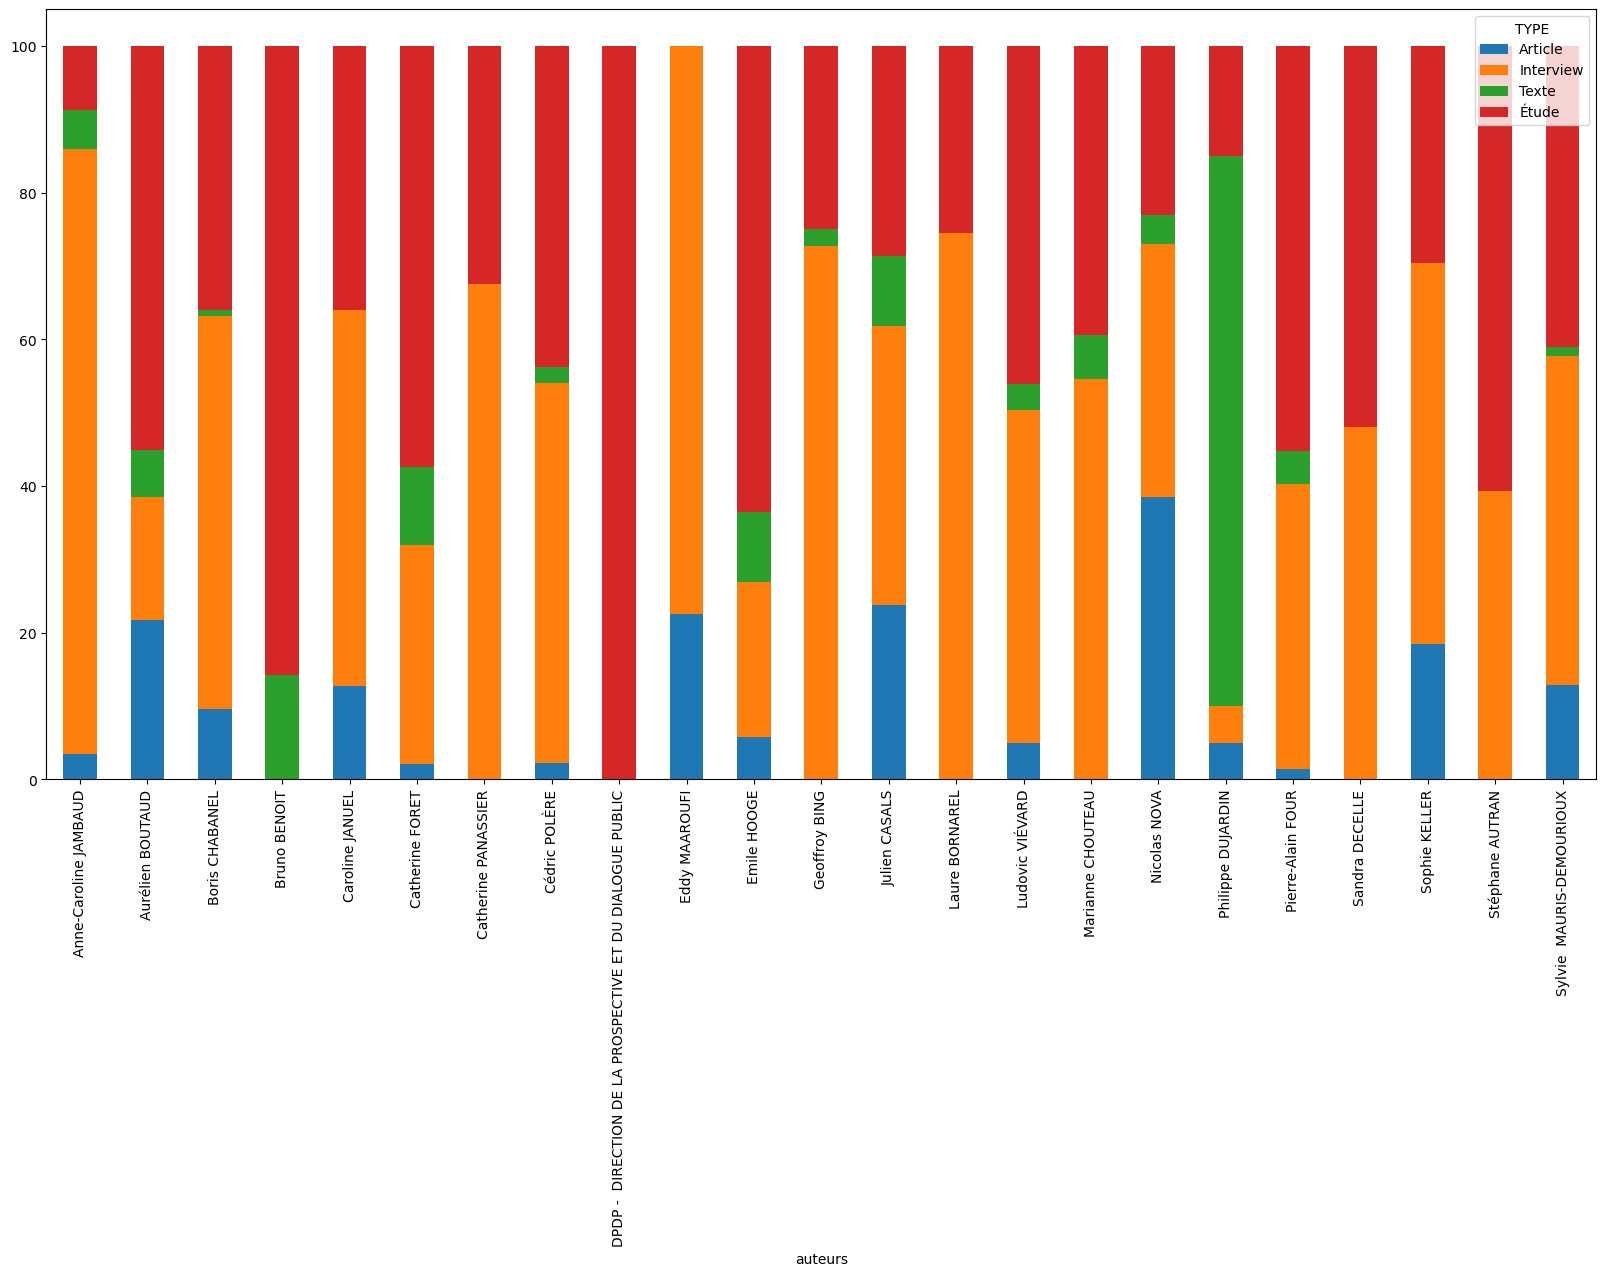

In [131]:
filtered_tmp = tmp.groupby("auteurs").filter(lambda x:len(x) >= 20)
filtered_tmp
temp = pd.crosstab(filtered_tmp.auteurs, filtered_tmp.TYPE)
temp.transpose().transform(lambda x:x/sum(x)).mul(100).transpose().plot(kind="bar", stacked=True, figsize=(20, 10))

In [55]:
import spacy
#import openai #!pip install openai
# Il faut aller chercher le token de openai pour utiliser leur API
# L'idée est de constituer un résumé pour chacun des documents et utiliser un moteur de recherche par mot clé sur les textes ?
# Ou sinon uniquement par tag ?

#nlp = spacy.load("...")